# Linear Regression Tutorial

# Linear Regression
Linear regression is a type of predictive analysis that attempts to predict the value of a dependent variable (y-axis) with another independent variable (x-axis).


Imagine plotting data points on a graph where you have one variable on the x-axis (independent variable) and another on the y-axis (dependent variable).

**Why do we use Linear Regression ?**

The goal of linear regression is to find a straight line (the "best-fit" line) that minimizes the vertical distance between each data point and the line.


This line represents the linear relationship between the variables.


***Example:*** Imagine you have a big bag of colorful balls, and you want to know how heavy they are based on their size. You know that bigger balls are usually heavier, but you want to find out exactly how heavy they are.


Linear regression is like a magical tool that helps you figure this out.

**The equation of a straight line**

The equation of a straight line using hypothesis function

***hθ(x)=θ0 +θ1x***

where:

**hθ(x)** is the predicted output (the hypothesis or prediction),

**x** is the input feature (independent variable),

**θ0** is the y-intercept parameter (bias),

**θ1** is the slope parameter (weight) associated with the input feature x.

This equation represents the linear relationship between the input feature x and the predicted output hθ(x) in the context of linear regression, where θ0 and θ1 are the parameters that need to be learned from the data through training.


The goal of training is to find the optimal values for θ0 and θ1 that minimize the difference between the predicted values hθ(x) and the actual target values.


***From the above Example:*** we want to guess how heavy a ball is just by looking at its size. We use our magic Straight line to make this guess. The line helps us make predictions.

**How to make straight line that best fits the data?**

To turn the hypothesis function into a straight line that best fits the data, we use a **cost function**.

# Cost function

**What cost function does?**

Cost function measures the difference between the predicted values and the actual target values.

The cost function for linear regression is typically the **Mean Squared Error (MSE)**.


The cost function ***(J)*** is one that measures the average distance between the outputs from a hypothesis (which is dependent on parameters θ0 and θ1) and the actual values.

It helps us answer the question: for what values of ***θ0*** and ***θ1*** will the hypothesized line best match our data points. The line best matches our data points when the cost function is minimized.

**The cost function is:**


***J((theta))=(1/2m)*(sum over i=1 to m(((h(theta)(x(i))) - y(i))^2))**


where:


***-h(theta)(x(i))*** is the predicted value for the i-th training example using the hypothesis hθ(x).


***-y(i)*** is actual target value for the i-th training example.


***-m *** is the total number of data points.


***-1/m*** to find the average.


***-1/2m and the squared sign*** on the end are simply there for computational convenience.


The goal of training is to minimize this cost function, which corresponds to finding the optimal values for the parameters the **θ0** y-intercept and **θ1** slope of the straight line that minimize the overall prediction error.


***From the above Example:*** We want our guesses to be as close as possible to the real weights of the balls. So, we use a special tool called a "cost function" to see how wrong our guesses are. Our goal is to make this cost as small as possible.

# Gradient Descent

**Gradient Descent** is an optimization algorithm that helps in finding the global minimum of the cost function. The basic idea is to iteratively update the parameters θ0 and θ1 in the opposite direction of the gradient of the cost function.


The update rules for gradient descent are:


***θ0: = θ0 - α (1/m)*(sum over i=1 to m (h(theta)(x(i))) - y(i))**


***θ1: = θ1 - α (1/m)(sum over i=1 to m (h(theta)(x(i))) - y(i))x(i)***


where:

**α** is the learning rate, controlling the step size of each update.

By repeatedly applying these update rules in a number of iterations, gradient descent gradually converges towards the global minimum of the cost function, effectively adjusting the parameters **θ0** and **θ1** to obtain the best-fitting straight line that minimizes the prediction error.


***From the above Example:***  To make our guesses better, we use another magical tool called "gradient descent." It helps us adjust our magic line a little bit at a time. We keep doing this until our guesses get really close to the real weights.

# Applying Linear Regresion Machine Learning

**1.Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load Dataset**

In [ ]:
df = pd.read_csv('/content/raw.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**3.Review The Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 4. Exploratory Data Analysis (EDA):

**Types of variables**

Important to check out types of variable in the dataset, segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


**NaN Values:**

If the columns has more than 50% of NaN values, drop those columns.

**Cardinality**

**Low cardinality:** If there's only one category in a column, it won't provide any unique information to our model. Low cardinality means the observation in the columns has constant value which means same value in all the rows of the columns. Ex. type of building has only apartment. So don’t include in the model. Drop


**High cardinality:** as low cardinality don’t give you same information to the model, High cardinality doesn’t give any information to the model. Can drop also.

As low cardinality gives low or no information and high cardinality is overload with information which both doesn’t help the model since model looks for trend.

**Multicollinearity:**  

Multicollinearity, that is, features in our feature matrix that are highly correlated with each other. A good way to detect this is to use a **heatmap**.

If few feature has corelation, we can only keep one feature, which one? Can check the info, if any of the feature has missing value, drop that.


**Leakage:**

Leakage, that is, features that were created using our target or that would give our model information that it won't have access to when it's deployed.

Leakage is that give your model access to information to which that would not have access if you were deploying in real world.

We should look  into the dataset & see is there any features that has similar information to the model, if is, drop those.

**5.Split:**

A key part in any model-building project is separating your target (y) (the thing you want to predict) from your features (X) (the information your model will use to make its predictions).

In [ ]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

# Feature Engineering

**Feature engineering** is a very broad term that consists of different techniques to process data. These techniques help us to process our raw data into processed data ready to be fed into a machine learning algorithm. These techniques include filling missing values, encode categorical variables, variable transformation, create new variables from existing ones and others.

**Simple Imputer**

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.


It is implemented by the use of the SimpleImputer() method which takes the following arguments :

missing_values : The missing_values placeholder which has to be imputed. By default is NaN


strategy: The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.

**One Hot Encoding(OHE)**

OHE is the standard approach to encode categorical data.

One hot encoding (OHE) creates a binary variable for each one of the different categories present in a variable. These binary variables take 1 if the observation shows a certain category or 0 otherwise. OHE is suitable for linear models.


One hot encoding (OHE) creates by replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation. Each one of the boolean variables are also known as dummy variables or binary variables.


For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise.

**Standard Scaling**

Feature scaling is the process of setting the variables on a similar scale. This is usually done using normalization, standardization.

Standardization is the process of centering the variable at 0 (zero mean) and standardizing the variance to 1 (unit variance), and it is suitable for variables with a Gaussian distribution.

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

**Train_Test_Split**

Create the feature matrix named X_train, which you'll use to train your model. Remember that your feature matrix should always be two-dimensional.


we're adding  _train tag to the variable names for our feature matrix and target vector. This is to remind us that this is the data we'll use to train our model, and not the data we'll use to test it.


Create the target vector named y_train, which you'll use to train your model. Remember that, in most cases, your target vector should be one-dimensional.


In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check data types and shape
print('X_train type:', type(X_train))
print('y_train type:', type(y_train))
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

# Check if 'MathScore' is in the DataFrame columns
print('MathScore in columns:', 'MathScore' in df.columns)

# Check for NaN values in 'MathScore'
print('NaN values in MathScore:', df['math_score'].isnull().sum())

X_train type: <class 'numpy.ndarray'>
y_train type: <class 'pandas.core.series.Series'>
X_train shape: (800, 19)
y_train shape: (800,)
MathScore in columns: False
NaN values in MathScore: 0


# Building Model

Baseline: The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?"

One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction prediction should be.

Calculate the mean of your target vector y_train and assign it to the variable y_mean.

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset


In [ ]:
from sklearn.metrics import mean_absolute_error

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean math score:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean math score: 66.49625
Baseline MAE: 11.947471875000002


**y_train.mean()** calculates the mean (average) of these target values, which is stored in the variable y_mean. It's the average math score of all students in the training set.


y_pred_baseline is Creating a **"baseline"** **prediction** where we predict the mean score for every student.


calculates the **Mean Absolute Error (MAE)** between the actual target values (y_train) and the baseline predictions (y_pred_baseline).

MAE measures the average absolute differences between the actual scores and the baseline (mean) predictions.

# Model Training

The steps to building and using a model are:

**Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

**Fit:** Capture patterns from provided data. This is the heart of modeling.

**Predict:** Just what it sounds like

**Evaluate:** Determine how accurate the model's predictions are.


Fitting simple linear regression

Import the LinearRegression class from the linear_model to train the model. Instantiate an object of the class named regressor.

**Define The Model**

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()

**Fit The Model**

In [ ]:
LinearRegression.fit(X_train, y_train)

LinearRegression()

**Predict The Model**

In [ ]:
y_pred = LinearRegression.predict(X_test)
y_pred

array([76.3879697 , 58.88597004, 76.99026483, 76.85180448, 87.62737816,
       79.0140238 , 64.65460865, 53.00791885, 74.18471015, 49.21353815,
       52.94765047, 36.66906418, 67.9139255 , 52.27725558, 86.71848338,
       70.53070205, 51.95556639, 46.8314386 , 48.82375101, 52.72669531,
       73.88582984, 38.88612362, 57.38074421, 36.32839723, 78.14908978,
       81.79995075, 75.3849409 , 46.1184787 , 31.03596334, 49.90094972,
       65.98409138, 70.4116652 , 60.5061564 , 83.73986218, 84.43184961,
       46.07265627, 76.10135181, 70.20596817, 65.85782103,  3.76186106,
       78.49792748, 67.25291552, 67.97175998, 60.2734092 , 79.67385074,
       67.60005539, 72.24589185, 24.76000748, 85.95581153, 70.08842684,
       75.41268803, 66.79864565, 81.16502181, 45.6635254 , 66.11051928,
       67.32545668, 86.13600492, 58.72739768, 82.23614367, 81.21768838,
       47.23421792, 72.04512129, 70.64302698, 55.92646405, 86.31798368,
       63.86663678, 59.48657443, 55.91061249, 57.20534331, 82.14

**Predicting test set result**

At this point, the model is now trained and ready to predict the output of new observations. Remember, we split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [ ]:
prediction_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference / Residual':y_test-y_pred})
prediction_df

,Actual Value,Predicted Value,Difference / Residual
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


**Evaluate the Model**

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.88


**Evaluating linear regression models**

There are various metrics in place that we can use to evaluate linear regression models. Since models can't be 100 percent efficient, evaluating the model on different metrics can help us optimize the performance, fine-tune it, and obtain better results. The metrics we can use include:

**Mean Absolute Error(MAE)** calculates the absolute difference between the actual and predicted values. We get the sum of all the prediction errors and divide them by the total number of data points.

**Mean Squared Error(MSE):** This is the most used metric. It finds the squared difference between actual and predicted values. We get the sum of the square of all prediction errors and divide it by the number of data points.


**R Squared(R2):** R2 is also called the coefficient of determination or goodness of fit score regression function. It measures how much irregularity in the dependent variable the model can explain. The R2 value is between 0 to 1, and a bigger value shows a better fit between prediction and actual value. From the sklearn.metrics module, import the r2_score function, and find the goodness of fit of the model.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean absolute error: 4.21
Mean squared error: 29.10


In [ ]:
score = r2_score(y_test, y_pred)*100
score

88.04332983749565

The Model is 88% accurate

Remamber the goal of Linear Regression:

To find a straight line (the "best-fit" line) that minimizes the vertical distance between each data point and the line.

See the best fit line in a graph below.

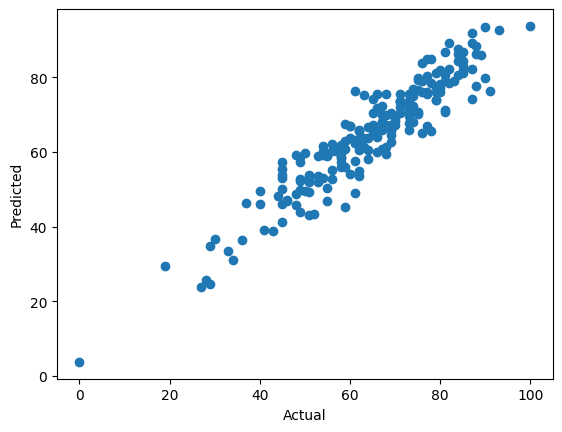

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

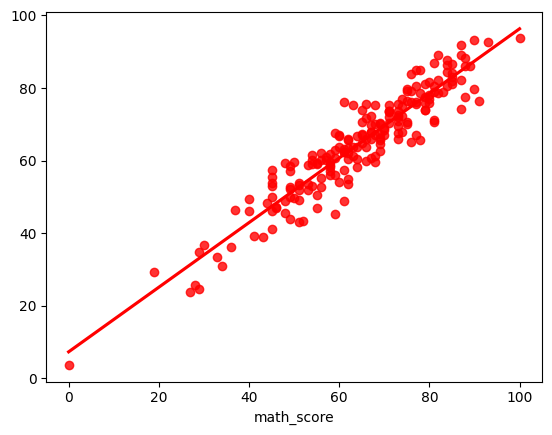

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');